In [1]:
using JuMP, Cbc, Plots

# MS-E2121 - Linear optimization
## Exercise session 1

First, we warm up with two small optimization problems. After that, you are expected to solve a small transportation problem.

### Demo exercise a)
\begin{align}
    \max \ & x_1 + 2x_2 + 5x_3 \\
    \text{s.t. } & x_1 - x_2 -3x_3 && \geq 5 \\
    & x_1 + 3x_2 - 7x_3 && \leq 10 \\
    & x_1 && \leq 10 \\
    & x_i \geq 0, \ \forall i \in \{1,2,3\}
\end{align}

In [2]:
model_a = Model(Cbc.Optimizer);

In [3]:
@variable(model_a, x[1:3] >= 0)

3-element Array{VariableRef,1}:
 x[1]
 x[2]
 x[3]

In [4]:
@objective(model_a, Max, x[1] + 2*x[2] + 5*x[3])

x[1] + 2 x[2] + 5 x[3]

In [5]:
@constraint(model_a, x[1] - x[2] - 3*x[3] >= 5)
@constraint(model_a, x[1] + 3*x[2] - 7*x[3] <= 10)
@constraint(model_a, x[1] <= 10)

x[1] <= 10.0

In [6]:
println(model_a)

Max x[1] + 2 x[2] + 5 x[3]
Subject to
 x[1] - x[2] - 3 x[3] >= 5.0
 x[1] + 3 x[2] - 7 x[3] <= 10.0
 x[1] <= 10.0
 x[1] >= 0.0
 x[2] >= 0.0
 x[3] >= 0.0



In [7]:
optimize!(model_a)

Presolve 2 (-1) rows, 3 (0) columns and 6 (-1) elements
0  Obj 4.8999999 Primal inf 0.033332367 (1) Dual inf 12.666664 (3)
2  Obj 19.0625
Optimal - objective value 19.0625
After Postsolve, objective 19.0625, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 19.0625 - 2 iterations time 0.002, Presolve 0.00


#### Extracting the solutions:
- termination_status(model) gives the reason for stopping the optimization process.
- objective_value(model) gives the final objective value
- value(model[:variable]) gives the final value of the given variable in the model. We could also do value(x) instead, since we only have one model. If we have multiple models each with a variable named x, value(x) would return the values corresponding to the variable that was defined last.

In [8]:
println(termination_status(model_a))
println(objective_value(model_a))
println(value.(model_a[:x])) 

OPTIMAL
19.0625
[10.0, 2.1875, 0.9374999999999999]


In [9]:
if termination_status(model_a) == MOI.OPTIMAL
    println("Found optimal solution $(objective_value(model_a)) at x=$(value.(model_a[:x]))")
else
    println("Optimization terminated with status $(termination_status(model_a))")
end

Found optimal solution 19.0625 at x=[10.0, 2.1875, 0.9374999999999999]


### Demo exercise b)
\begin{align}
    \max \ & 2x_1 + 4x_2 \\
    \text{s.t. } & x_1 + x_2 && \leq 5 \\
    & -x_1 + 3x_2 && \leq 1 \\
    & x_1 && \leq 5 \\
    & x_2 && \leq 5 \\
    & x_i \geq 0, \ \forall i \in \{1,2\}
\end{align}

$~$$~$

While it is possible to write out the constraints individually, it is sometimes preferable to use the matrix form:
\begin{align}
    \max \ & c^\top x \\
    \text{s.t. } & Ax && \leq b \\
    & x_i \geq 0, \ \forall i \in \{1,2\},
\end{align}

$~$
$~$

where for this problem, $c = \begin{bmatrix}
2 \\
4 
\end{bmatrix}$, $A = \begin{bmatrix}
1 & 1 \\
-1 & 3 \\
1 & 0 \\
0 & 1 
\end{bmatrix}$ and $b = \begin{bmatrix}
5 \\
1 \\
5 \\
5 
\end{bmatrix}$

In [10]:
c = [2 4]
A = [1 1; -1 3; 1 0; 0 1]
b = [5 1 5 5]'
model_b = Model(Cbc.Optimizer);

In [11]:
@variable(model_b, x[i=1:2] >= 0)

2-element Array{VariableRef,1}:
 x[1]
 x[2]

In [12]:
@objective(model_b, Max, sum(c[i]*x[i] for i in 1:2))

2 x[1] + 4 x[2]

In [13]:
@constraint(model_b, [j in 1:4], sum(A[j,i]*x[i] for i in 1:2) <= b[j])

4-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.LessThan{Float64}},ScalarShape},1}:
 x[1] + x[2] <= 5.0
 -x[1] + 3 x[2] <= 1.0
 x[1] <= 5.0
 x[2] <= 5.0

In [14]:
println(model_b)

Max 2 x[1] + 4 x[2]
Subject to
 x[1] + x[2] <= 5.0
 -x[1] + 3 x[2] <= 1.0
 x[1] <= 5.0
 x[2] <= 5.0
 x[1] >= 0.0
 x[2] >= 0.0



In [15]:
optimize!(model_b)

Presolve 2 (-2) rows, 2 (0) columns and 4 (-2) elements
0  Obj -0 Dual inf 5.999998 (2)
2  Obj 13
Optimal - objective value 13
After Postsolve, objective 13, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 13 - 2 iterations time 0.002, Presolve 0.00


In [16]:
println(termination_status(model_b))
println(objective_value(model_b))
println(value.(model_b[:x])) 

OPTIMAL
13.0
[3.5, 1.5]


In [17]:
if termination_status(model_b) == MOI.OPTIMAL
    println("Found optimal solution $(objective_value(model_b)) at x=$(value.(model_b[:x]))")
else
    println("Optimization terminated with status $(termination_status(model_b))")
end

Found optimal solution 13.0 at x=[3.5, 1.5]


We can also plot the constraints, the corresponding feasible region and the objective function at the optimal point to verify our result. We can see that the objective function indeed touches a vertex of the feasible region at x = (3.5, 1.5).

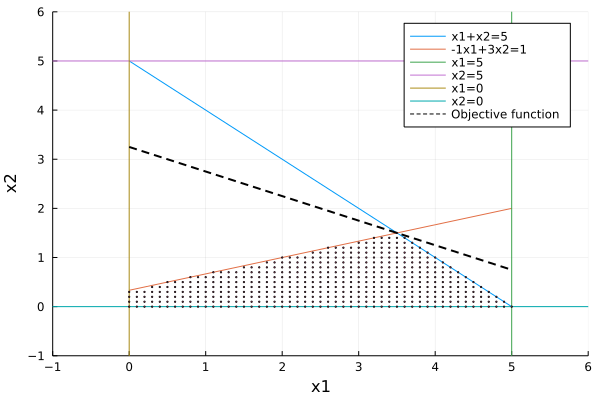

In [18]:
function plot_model(A, b, c; sol=nothing, xlim=5, ylim=5)
    
    # Check problem dimensions and throw an error if not 2D
    m,n = size(A)
    if n != 2
        throw(ArgumentError("Model is not 2-dimensional"))
    end
    
    # Some ranges to help with plotting, these are similar to what you may have used in Matlab
    x1_range = collect(0:0.1:5)
    x2_range = collect(0:0.1:5)
    
    # Create empty plot
    plot(xlim=(-1,6), ylim=(-1,6), xlabel="x1", ylabel="x2")
    
    # Add lines Ax=b to the plot 
    for con in 1:m
        a_x1 = A[con,1]
        a_x2 = A[con,2]
        if a_x1!=0 && a_x2!=0
            plot!(x1_range, (-a_x1*x1_range.+b[con])/a_x2, label="$(a_x1==1 ? "" : a_x1)x1+$(a_x2==1 ? "" : a_x2)x2=$(b[con])")
        elseif a_x1!=0 && a_x2==0
            vline!([b[con]], label="$(a_x1==1 ? "" : a_x1)x1=$(b[con])")
        elseif a_x1==0 && a_x2!=0
            hline!([b[con]], label="$(a_x2==1 ? "" : a_x2)x2=$(b[con])")
        end
    end
    vline!([0], label="x1=0")
    hline!([0], label="x2=0")

    # Collect the points in the feasible region using a grid
    feasible_region = []
    for x1 in x1_range
        for x2 in x2_range
            if all(A*[x1;x2].<=b)
                push!(feasible_region, [x1, x2])
            end
        end
    end

    # Turn the array of arrays into a 2D-array and plot the points
    feasible_region = hcat(feasible_region...)
    scatter!(feasible_region[1,:], feasible_region[2,:], ms=1, label=false)
    
    # If objective function value was given as an argument, plot the objective function with that value
    if !isnothing(sol)
        plot!(x1_range, (-c[1]*x1_range.+sol)/c[2], linestyle=:dash, linewidth=2, color=:black, label="Objective function")
    end
    
    # This is how you would add a title to your plot
    title!("")
end

plot_model(A,b,c; sol=13)

### Student exercise

_Source: Julia Programming for Operations Research 2$^{nd}$ edition (Online)._
_Available at: http://www.chkwon.net/julia - published by Changhyun Kwon_

$~$
$~$

Consider the following network where the combined supplies from the Austin and Buffalo nodes need to meet the demands coming from Chicago, Denver, and Erie. The supplies available are represented by $S$ and the demands by $D$, the costs of transporting in each arc connecting supply and demand nodes are shown as $c$.

<img src="https://softcover.s3.amazonaws.com/13172/juliabook2/images/network/example_transportation.png" max-width=400px/>
Solve the transportation problem to the minimum cost. The data is given, you will need to:

- create decision variables (What are the decisions in this problem? The amount transported from city i to city j.)
- formulate the objective function (What are we minimizing? The total transportation cost.)
- write constraints (What constraints need to be satisfied? Suppliers cannot send out more than their supply capacity and the demand in each node must be fulfilled.)

The correct optimal cost is 251.

In [19]:
# Supply nodes and their capacities
supply_nodes = ["Austin" "Buffalo"]
S = [15 25]
# Demand nodes and corresponding demands
demand_nodes = ["Chicago" "Denver" "Erie"]
D = [15 12 13]
# Transportation unit costs
c = [10 7 9; 4 9 8]

# Converting arrays to dictionaries
s_dict = Dict(supply_nodes .=> S)
d_dict = Dict(demand_nodes .=> D)
c_dict = Dict( (supply_nodes[i], demand_nodes[j]) => c[i,j]
          for i in 1:length(supply_nodes), j in 1:length(demand_nodes) )
#%
# Preparing an Optimization Model
tp = Model(Cbc.Optimizer)

@variable(tp, x[supply_nodes, demand_nodes] >= 0)

@objective(tp, Min, sum(c_dict[i,j]*x[i,j] for i in supply_nodes, j in demand_nodes))

@constraint(tp, supply[i in supply_nodes], sum(x[i,j] for j in demand_nodes) <= s_dict[i] )
@constraint(tp, demand[j in demand_nodes], sum(x[i,j] for i in supply_nodes) >= d_dict[j] )

println(tp)
optimize!(tp)
#%


Min 10 x[Austin,Chicago] + 7 x[Austin,Denver] + 9 x[Austin,Erie] + 4 x[Buffalo,Chicago] + 9 x[Buffalo,Denver] + 8 x[Buffalo,Erie]
Subject to
 demand[Chicago] : x[Austin,Chicago] + x[Buffalo,Chicago] >= 15.0
 demand[Denver] : x[Austin,Denver] + x[Buffalo,Denver] >= 12.0
 demand[Erie] : x[Austin,Erie] + x[Buffalo,Erie] >= 13.0
 supply[Austin] : x[Austin,Chicago] + x[Austin,Denver] + x[Austin,Erie] <= 15.0
 supply[Buffalo] : x[Buffalo,Chicago] + x[Buffalo,Denver] + x[Buffalo,Erie] <= 25.0
 x[Austin,Chicago] >= 0.0
 x[Buffalo,Chicago] >= 0.0
 x[Austin,Denver] >= 0.0
 x[Buffalo,Denver] >= 0.0
 x[Austin,Erie] >= 0.0
 x[Buffalo,Erie] >= 0.0

Presolve 5 (0) rows, 6 (0) columns and 12 (0) elements
0  Obj 0 Primal inf 40 (3)
4  Obj 251
Optimal - objective value 251
Optimal objective 251 - 4 iterations time 0.002


In [20]:
#%
obj = objective_value(tp)
x_star = value.(x)

println("Minimum cost is $obj with following transportation")

for s in supply_nodes, d in demand_nodes
    println("from $s to $d: $(x_star[s, d]) units")
end
#%

Minimum cost is 251.0 with following transportation
from Austin to Chicago: 0.0 units
from Austin to Denver: 12.0 units
from Austin to Erie: 3.0 units
from Buffalo to Chicago: 15.0 units
from Buffalo to Denver: 0.0 units
from Buffalo to Erie: 10.0 units
